In [ ]:
#install.packages(c('ncvreg', 'glmnet','tree','randomForest', 'MASS', 'ROCR', 'dplyr', 'GGally'))

In [39]:
library(ncvreg)          # https://cran.r-project.org/web/packages/ncvreg/index.html
library(glmnet)          # https://cran.r-project.org/web/packages/glmnet/index.html
library(tree)            # https://cran.r-project.org/web/packages/tree/index.html
library(randomForest)    # https://cran.r-project.org/web/packages/randomForest/index.html
library(MASS)            # https://cran.r-project.org/web/packages/MASS/index.html
library(ROCR)            # https://cran.r-project.org/web/packages/ROCR/index.html
library(dplyr)           # https://cran.r-project.org/web/packages/dplyr/index.html
library(corrplot)          # https://cran.r-project.org/web/packages/GGally/index.html

In [33]:
set.seed(1)                    # random seed 를 고정 시켜 random 함수를 사용하는 값이 
data("Boston")                 # Boston 데이터 로딩

n <- nrow(Boston)              # Boston 의 행의 숫자
p <- ncol(Boston)              # Boston 의 열의 숫자

x <- as.matrix(Boston[,-p])    # 마지막 열인 medv 를 빼고 x 데이터로 만든다.
y <- medv <- Boston[,p]        # 마지막 열인 medv 를 y 데이터로 만든다.

[1] 21.89483

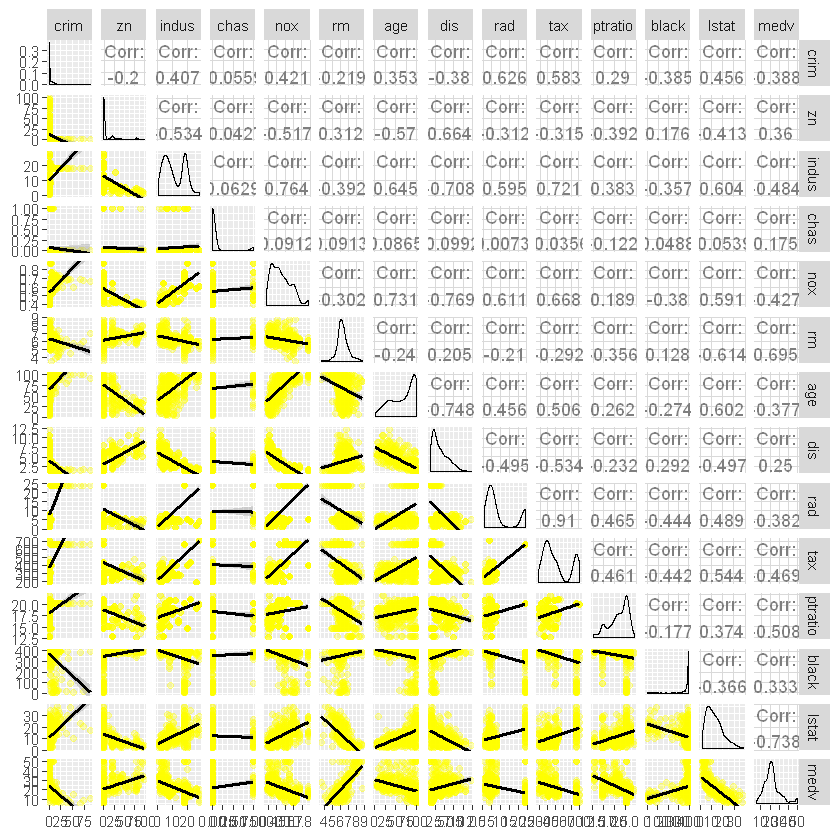

In [48]:
# linear regression
# https://www.rdocumentation.org/packages/stats/versions/3.6.0/topics/lm

# medv 를 반응 변수로, 선형 적합을 시킨다.
lreg <- lm(medv ~., data = Boston)
# lreg fit 된 모델에 Bosten 으로 예측한다.
lreg.medv <- predict(lreg, newdata = Boston[,-p])
# 뭔가 이상한건, Boston 의 데이터로 fit 하고 그 같은 데이터로 Boston predict 하는 부분이다.
# Linear 에서는 그런데 이렇게 하지만, 밑에서는 Cross-Validation  을 쓰겟지?

# mse 확인 
# https://en.wikipedia.org/wiki/Mean_squared_error
mse_linear <- mean((lreg.medv - y)^2)  # 예측 값인 y-hat 에 y 를 뺀 거리의 제곱 평균 값 으로 잘 예측했는지의 값을 판단 한다.
mse_linear
# 각 변수 간의 산점도 및 correlation 등
# https://www.rdocumentation.org/packages/GGally/versions/1.4.0/topics/ggpairs
# https://stackoverflow.com/questions/39709745/decreasing-the-line-thickness-and-corr-font-size-in-ggpairs-plot
ggpairs(data = Boston,
    lower = list(
        continuous = wrap("smooth", alpha = 0.3, color = "yellow") 
    )
)

[1] 22.47853

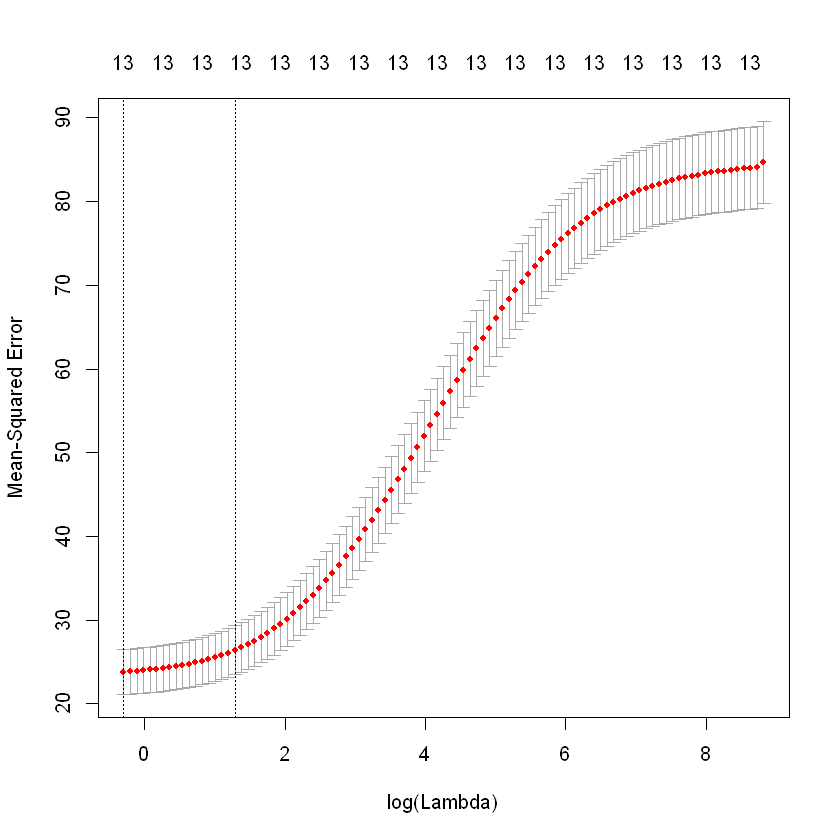

In [56]:
# ridge regression
# https://www.rdocumentation.org/packages/glmnet/versions/2.0-18/topics/cv.glmnet
# Cross-Validation for glmnet 으로 최적의 람다를 찾는다.
# alpha = 0 으로 초기값을 정한다.
cv.rr <- cv.glmnet(x, y, alpha = 0)
# Cross-Validation 으로 최적의 람다를 구하는 plot 을 그려본다.
plot(cv.rr)

# Fit A GLM With Lasso Or Elasticnet Regularization
# https://www.rdocumentation.org/packages/glmnet/versions/2.0-18/topics/glmnet
# Cross-Validation 의 가장 작은 lambda.min 으로 ridge regression 을 한다.
rr <- glmnet(x, y, alpha = 0, lambda = cv.rr$lambda.min) 

# ridge fit 된 모델에 Bosten 으로 예측한다.
rr.medv <- predict(rr, x)


# mse 확인 
# https://en.wikipedia.org/wiki/Mean_squared_error
mse_ridge <- mean((rr.medv - y)^2)  # 예측 값인 y-hat 에 y 를 뺀 거리의 제곱 평균 값 으로 잘 예측했는지의 값을 판단 한다.
mse_ridge

[1] 21.89771

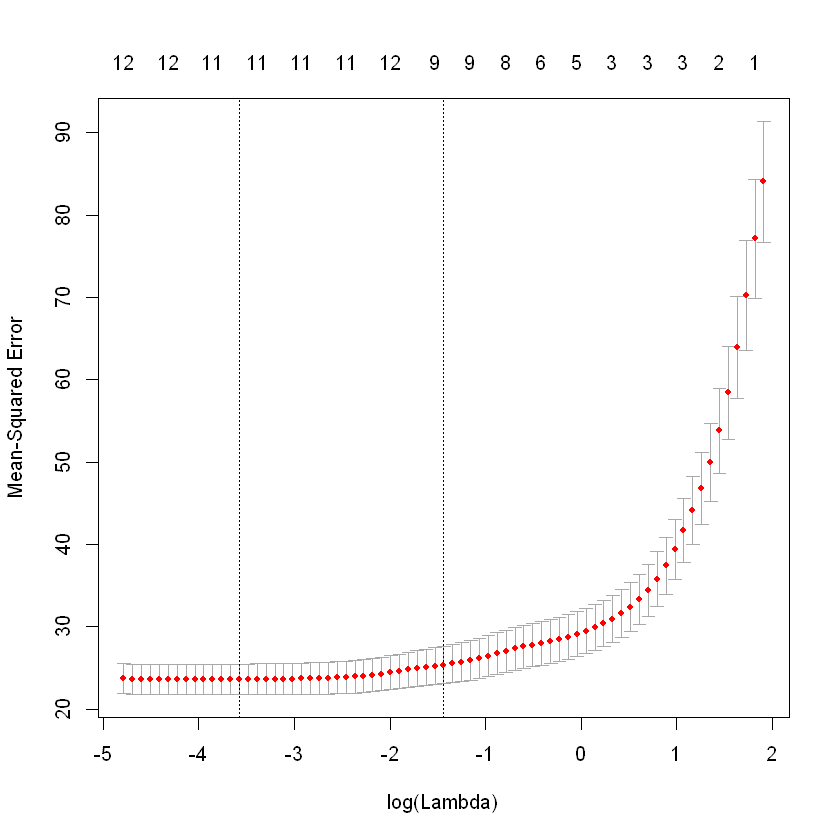

In [55]:
# lasso regression
# https://www.rdocumentation.org/packages/glmnet/versions/2.0-18/topics/cv.glmnet
# Cross-Validation for glmnet 으로 최적의 람다를 찾는다.
# alpha = 1 으로 초기값을 정한다.
cv.lasso <- cv.glmnet(x, y, alpha = 1)
# Cross-Validation 으로 최적의 람다를 구하는 plot 을 그려본다.
plot(cv.lasso)

# Fit A GLM With Lasso Or Elasticnet Regularization
# https://www.rdocumentation.org/packages/glmnet/versions/2.0-18/topics/glmnet
# Cross-Validation 의 가장 작은 lambda.min 으로 lasso regression 을 한다.
lasso <- glmnet(x, y, alpha = 0, lambda = cv.lasso$lambda.min)
# lasso fit 된 모델에 Bosten 으로 예측한다.
lasso.medv <- predict(lasso, x)

# mse 확인 
# https://en.wikipedia.org/wiki/Mean_squared_error
mse_lasso <- mean((lasso.medv - y)^2)  # 예측 값인 y-hat 에 y 를 뺀 거리의 제곱 평균 값 으로 잘 예측했는지의 값을 판단 한다.
mse_lasso

[1] 21.89993

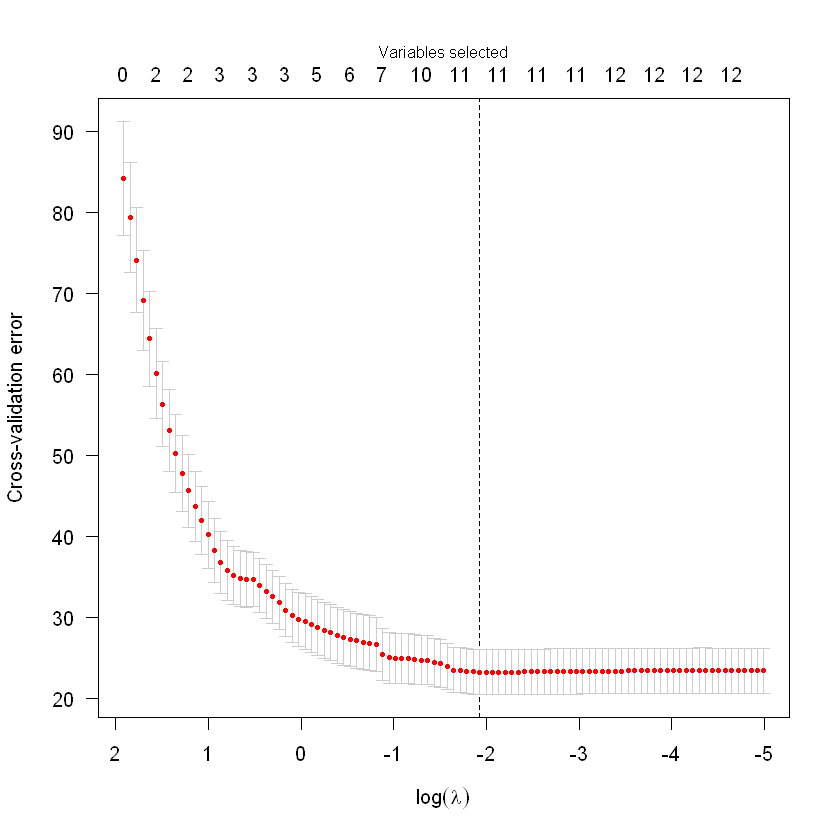

In [57]:
# scad
# https://www.rdocumentation.org/packages/ncvreg/versions/3.11-1/topics/cv.ncvreg
# Cross-Validation for Ncvreg/Ncvsurv 으로 최적의 람다를 찾는다.
cv.scad <- cv.ncvreg(x, y, penalty = "SCAD")
# Cross-Validation 으로 최적의 람다를 구하는 plot 을 그려본다.
plot(cv.scad)

# Fit A GLM With Lasso Or Elasticnet Regularization
# https://www.rdocumentation.org/packages/glmnet/versions/2.0-18/topics/glmnet
# Cross-Validation 의 가장 작은 lambda.min 으로  SCAD-penalized regression 을 한다.
scad <- ncvreg(x, y, penalty = "SCAD", lambda = cv.scad$lambda.min) 
scad.medv <- predict(scad, x)

# mse 확인 
# https://en.wikipedia.org/wiki/Mean_squared_error
mse_scad <- mean((scad.medv - y)^2)  # 예측 값인 y-hat 에 y 를 뺀 거리의 제곱 평균 값 으로 잘 예측했는지의 값을 판단 한다.
mse_scad

Warning message in text.default(xy$x[ind], xy$y[ind] + 0.5 * charht, rows[ind], :
""use.n"는 그래픽 매개변수가 아닙니다"Warning message in text.default(xy$x[leaves], xy$y[leaves] - 0.5 * charht, labels = stat, :
""use.n"는 그래픽 매개변수가 아닙니다"

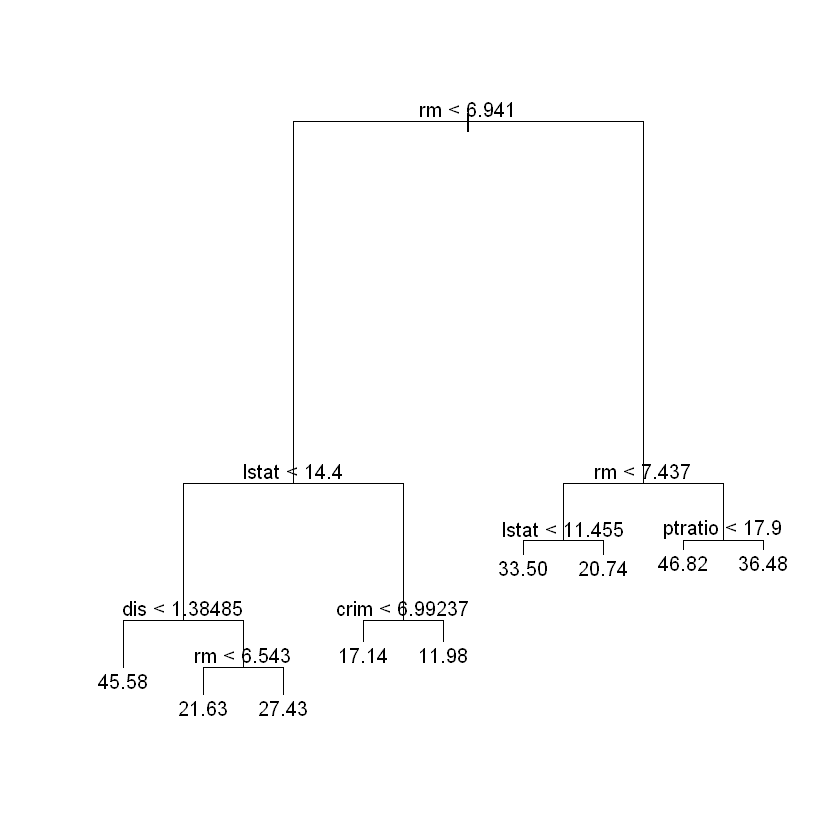

[1] 13.30788

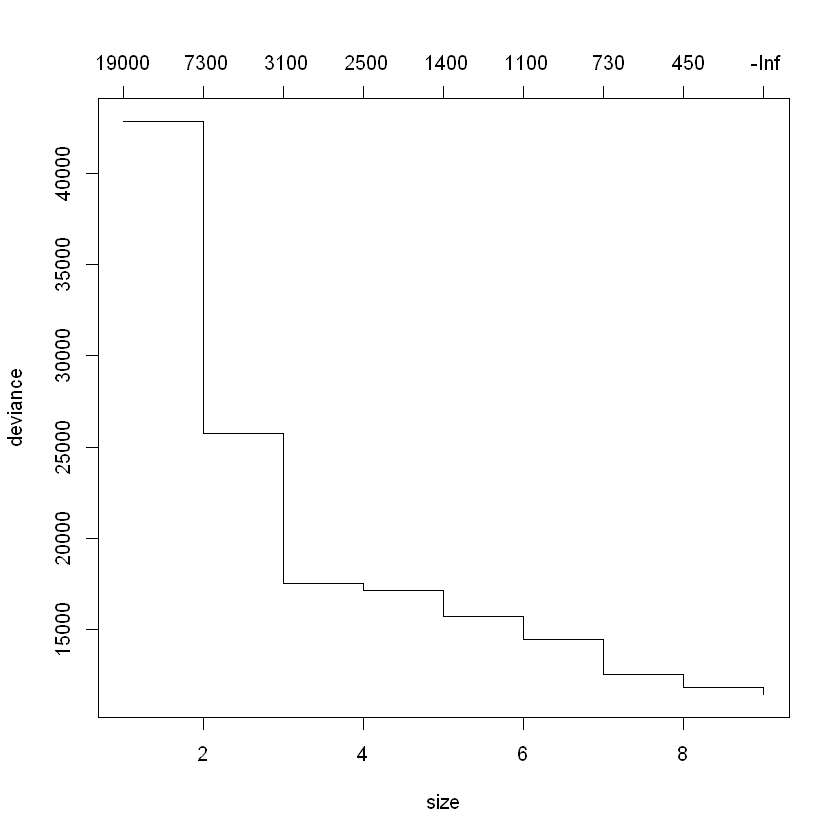

In [81]:
# Regression tree
# https://www.rdocumentation.org/packages/tree/versions/1.0-40
# medv 를 반응 변수로, 나머지는 설명 변수로 tree 적합을 시킨다.
tree.sg <- tree(medv ~ ., data = Boston)
plot(tree.sg)
text(tree.sg, use.n=TRUE)

# https://www.rdocumentation.org/packages/tree/versions/1.0-40/topics/cv.tree
# tree 의 복잡성을 산출 하기 위해 Cross-Validation 을 진행 한다.
tree.cv <- cv.tree(tree.sg)
plot(tree.cv)

# pruning 기법으로 tree 의 가지를 쳐서 제한을 둔다.
# cross-validation 의 deviance 의 값으로 가장 낮은 값의 index 를 선택하여, 거기 까지만 pruning 한다.
# https://www.rdocumentation.org/packages/tree/versions/1.0-40/topics/prune.tree
tree.prune <- prune.tree(tree.sg, best = tree.cv$size[which.min(tree.cv$dev)])
# pruning 한 모델을 가지고 test set 을 넣어 예측한다.
tree.medv <- predict(tree.prune, newdata = Boston[,-p])

# mse 확인 
# https://en.wikipedia.org/wiki/Mean_squared_error
mse_tree <- mean((tree.medv - y)^2)  # 예측 값인 y-hat 에 y 를 뺀 거리의 제곱 평균 값 으로 잘 예측했는지의 값을 판단 한다.
mse_tree

[1] 1.956108

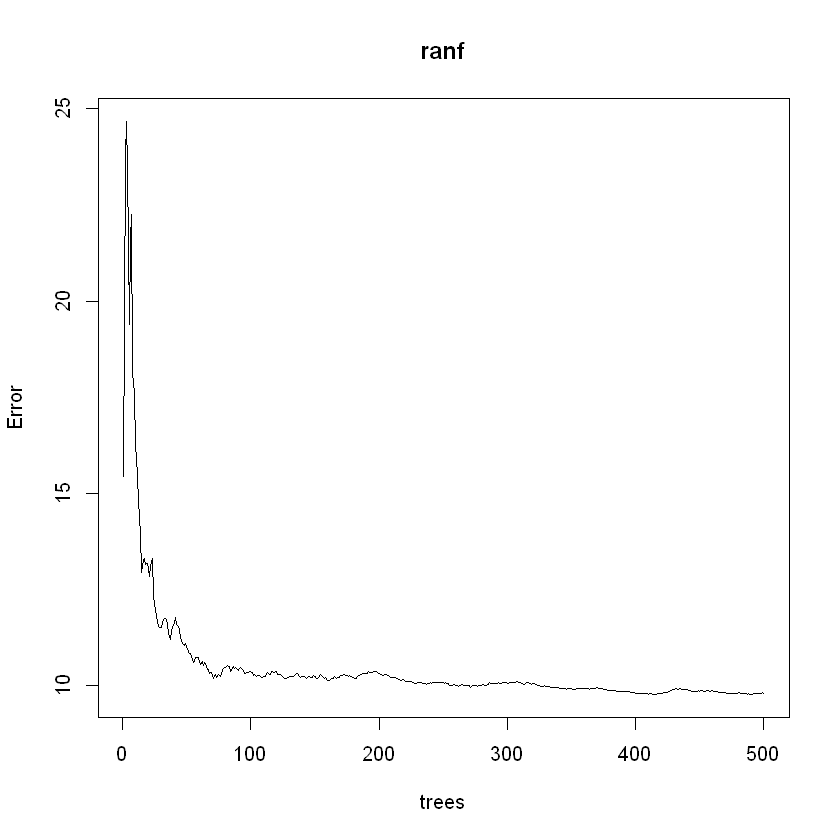

In [83]:
# RandomForest
# https://www.rdocumentation.org/packages/randomForest/versions/4.6-14/topics/randomForest
# medv 를 반응 변수로, 나머지는 설명 변수로 randomForest 적합을 시킨다.
ranf <- randomForest(medv ~ ., data = Boston)
plot(ranf)

# RandomForest 로 fitting 된 모델로 Boston 데이터로 predict 한다.
ranf.medv <- predict(ranf, newdata = Boston)

# mse 확인 
# https://en.wikipedia.org/wiki/Mean_squared_error
mse_ranf <- mean((ranf.medv - y)^2)  # 예측 값인 y-hat 에 y 를 뺀 거리의 제곱 평균 값 으로 잘 예측했는지의 값을 판단 한다.
mse_ranf

In [109]:

# 각 모델 방법의 result 종류를 가지고 data frame 을 만든다.
data.frame(method=c('Linear','Ridge','Lasso','SCAD','Tree', 'RandomForest'),
           mse=c(mse_linear,
                 mse_ridge,
                 mse_lasso,
                 mse_scad,
                 mse_tree,
                 mse_ranf # random forest 가 굉장히 낮다.
                 ))

# 이 방법의 문제는 Train 데이터로 fit 시키고 그 Train 데이터로 Predict 하므로, 실제 데이터는 이렇게 하면 안되기는 하다.
# 그런데 Cross-Validation 으로 전부 하였으므로 문제가 없다.
# RandomForest 가 MSE (error) 가 제일 작다.

method,mse
Linear,21.894831
Ridge,22.478531
Lasso,21.897707
SCAD,21.899930
Tree,13.307879
RandomForest,1.956108


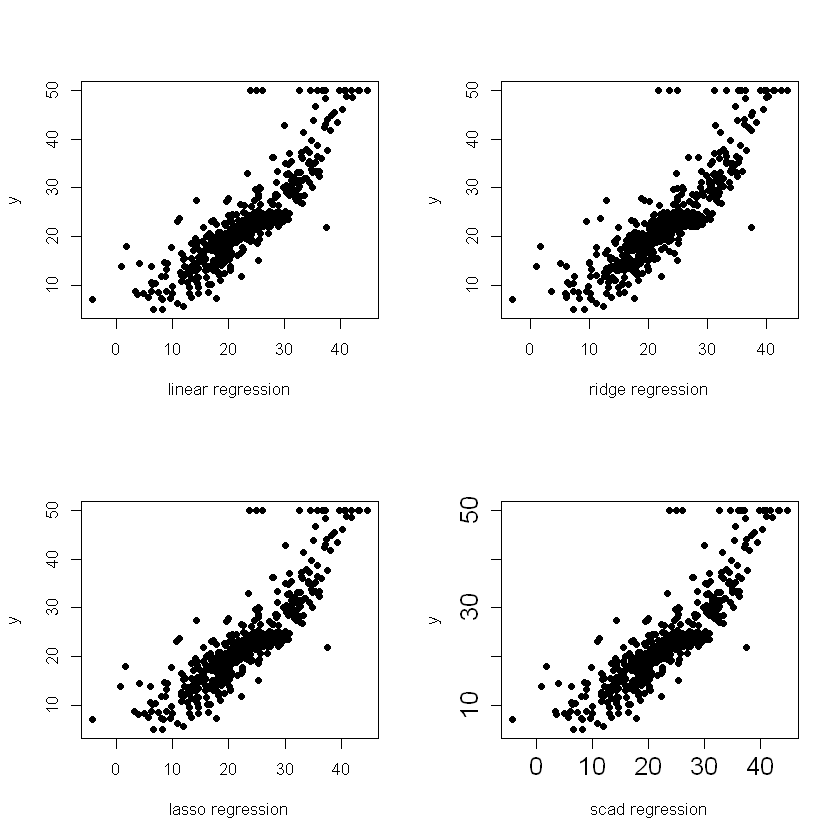

In [108]:
# 각 모델의 prediction 데이터들의 산점도
par(mfrow=c(2,2))
plot(y ~ lreg.medv, pch=16, xlab="linear regression")
plot(y ~ rr.medv, pch=16, xlab="ridge regression")
plot(y ~ lasso.medv, pch=16, xlab="lasso regression")
plot(y ~ scad.medv, pch=16, cex.axis=1.5,xlab="scad regression")

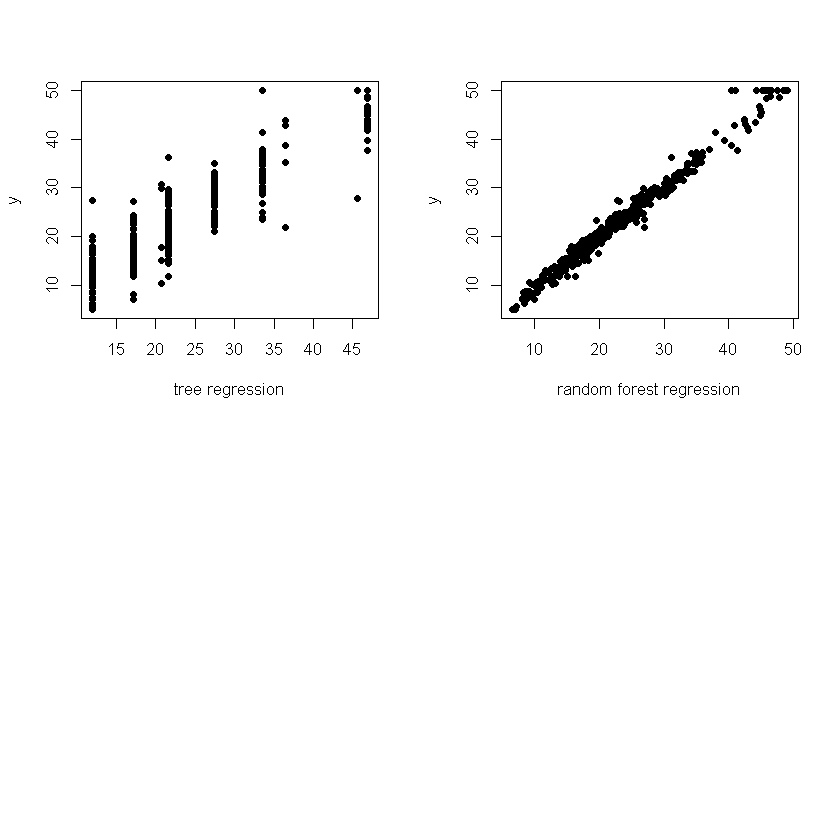

In [110]:
par(mfrow=c(2,2))
plot(y ~ tree.medv, pch=16, xlab="tree regression")
plot(y ~ ranf.medv, pch=16 ,xlab="random forest regression")
# 결론. Random Forest 가 수치, graph 가 안정적으로 들어가 있다.